 ### <center> Lista 4 - Redes Neurais Artificiais
    Disciplina: Aprendizagem de Máquina
    Professor: César Lincoln Cavalcante Mattos
    Aluno: Davyson dos Santos Ribeiro - Matrícula: 564309
    Período: 2024.1

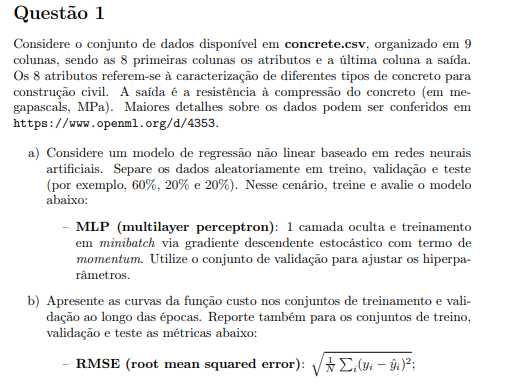
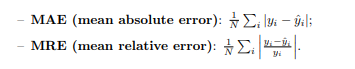

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Função para carregar e preparar os dados
def load_and_prepare_data(filename, target_col=-1):
    data = pd.read_csv(filename)
    X = data.iloc[:, :target_col].values  # Atributos
    Y = data.iloc[:, target_col].values.reshape(-1, 1)  # Saída

    # Normalizar os dados
    X = (X - X.mean(axis=0)) / X.std(axis=0)

    # Dividir os dados em treino (60%), validação (20%) e teste (20%)
    np.random.seed(42)
    indices = np.random.permutation(X.shape[0])
    train_size = int(X.shape[0] * 0.6)
    val_size = int(X.shape[0] * 0.2)

    X_train = X[indices[:train_size]]
    X_val = X[indices[train_size:train_size + val_size]]
    X_test = X[indices[train_size + val_size:]]
    
    Y_train = Y[indices[:train_size]]
    Y_val = Y[indices[train_size:train_size + val_size]]
    Y_test = Y[indices[train_size + val_size:]]

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [4]:
# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
# Inicialização dos pesos
def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

In [7]:
# Passo à frente (Forward pass)
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # Como é uma regressão, a ativação da última camada é linear
    return Z1, A1, Z2, A2

In [ ]:
# Retropropagação (Backpropagation)
def backward_pass(X, Y, Z1, A1, Z2, A2, W2):
    m = X.shape[0]

    # output
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # hidden
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

In [9]:
# Atualização dos pesos
def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate, momentum, v_dW1, v_db1, v_dW2, v_db2):
    v_dW1 = momentum * v_dW1 + (1 - momentum) * dW1
    v_db1 = momentum * v_db1 + (1 - momentum) * db1
    v_dW2 = momentum * v_dW2 + (1 - momentum) * dW2
    v_db2 = momentum * v_db2 + (1 - momentum) * db2

    W1 -= learning_rate * v_dW1
    b1 -= learning_rate * v_db1
    W2 -= learning_rate * v_dW2
    b2 -= learning_rate * v_db2
    
    return W1, b1, W2, b2, v_dW1, v_db1, v_dW2, v_db2

In [10]:
# Funções de custo e métricas
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse_loss(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mre(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [11]:
# Treinamento da rede
def train(X_train, Y_train, X_val, Y_val, input_size, hidden_size, output_size, epochs, learning_rate, momentum, batch_size):
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)
    v_dW1, v_db1, v_dW2, v_db2 = 0, 0, 0, 0
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        Y_train_shuffled = Y_train[permutation]
        
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i + batch_size]
            Y_batch = Y_train_shuffled[i:i + batch_size]
            
            Z1, A1, Z2, A2 = forward_pass(X_batch, W1, b1, W2, b2)
            dW1, db1, dW2, db2 = backward_pass(X_batch, Y_batch, Z1, A1, Z2, A2, W2)
            W1, b1, W2, b2, v_dW1, v_db1, v_dW2, v_db2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate, momentum, v_dW1, v_db1, v_dW2, v_db2)
        
        # Compute training loss
        _, _, _, A2_train = forward_pass(X_train, W1, b1, W2, b2)
        train_loss = mse_loss(Y_train, A2_train)
        train_losses.append(train_loss)

        # Compute validation loss
        _, _, _, A2_val = forward_pass(X_val, W1, b1, W2, b2)
        val_loss = mse_loss(Y_val, A2_val)
        val_losses.append(val_loss)
        
        print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {train_loss}, Validation Loss: {val_loss}')
    
    return W1, b1, W2, b2, train_losses, val_losses

In [12]:
# Avaliação e cálculo das métricas
def evaluate_and_print_metrics(X_train, Y_train, X_val, Y_val, X_test, Y_test, W1, b1, W2, b2):
    _, _, _, Y_train_pred = forward_pass(X_train, W1, b1, W2, b2)
    _, _, _, Y_val_pred = forward_pass(X_val, W1, b1, W2, b2)
    _, _, _, Y_test_pred = forward_pass(X_test, W1, b1, W2, b2)

    metrics = {
        "Training": (Y_train, Y_train_pred),
        "Validation": (Y_val, Y_val_pred),
        "Test": (Y_test, Y_test_pred)
    }

    for split, (true, pred) in metrics.items():
        print(f"{split} RMSE: {rmse(true, pred)}, MAE: {mae(true, pred)}, MRE: {mre(true, pred)}")

In [13]:
# Função para plotar as curvas de custo
def plot_loss_curves(train_losses, val_losses):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [14]:
# Carregar e preparar os dados
X_train, X_val, X_test, Y_train, Y_val, Y_test = load_and_prepare_data('concrete.csv')

In [15]:
# Parâmetros
input_size = X_train.shape[1]
hidden_size = 10  # Número de neurônios na camada oculta
output_size = 1  # Saída única para regressão
epochs = 1000
learning_rate = 0.01
momentum = 0.9
batch_size = 32

In [16]:
# Treinamento
W1, b1, W2, b2, train_losses, val_losses = train(X_train, Y_train, X_val, Y_val, input_size, hidden_size, output_size, epochs, learning_rate, momentum, batch_size)

Epoch 1/1000, Training Loss: 649.0214822842477, Validation Loss: 631.3638121104856
Epoch 2/1000, Training Loss: 161.53663526604143, Validation Loss: 190.9794280240327
Epoch 3/1000, Training Loss: 113.70037939839888, Validation Loss: 122.02711873430721
Epoch 4/1000, Training Loss: 105.30892629677071, Validation Loss: 105.33049201816118
Epoch 5/1000, Training Loss: 99.12362591891647, Validation Loss: 98.8878452480533
Epoch 6/1000, Training Loss: 95.60477826912098, Validation Loss: 97.42000610631153
Epoch 7/1000, Training Loss: 93.41506425419988, Validation Loss: 94.07162081278933
Epoch 8/1000, Training Loss: 91.94348947598286, Validation Loss: 93.06074774120684
Epoch 9/1000, Training Loss: 91.28461194602883, Validation Loss: 93.65722383224848
Epoch 10/1000, Training Loss: 90.47167612622854, Validation Loss: 89.73734631090936
Epoch 11/1000, Training Loss: 89.91141788411099, Validation Loss: 92.17018710422857
Epoch 12/1000, Training Loss: 89.57271455104669, Validation Loss: 90.285477724452

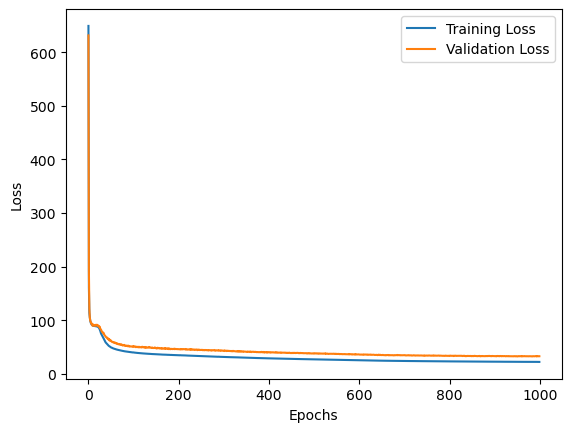

In [17]:
# Plotagem das curvas de custo
plot_loss_curves(train_losses, val_losses)

In [18]:
# Avaliação e cálculo das métricas
evaluate_and_print_metrics(X_train, Y_train, X_val, Y_val, X_test, Y_test, W1, b1, W2, b2)

Training RMSE: 4.716284756180903, MAE: 3.58691732654579, MRE: 0.12471537598558007
Validation RMSE: 5.731570146393664, MAE: 4.348349375299455, MRE: 0.16631356099873998
Test RMSE: 5.740298733995445, MAE: 4.6177349239328995, MRE: 0.1513927575118539


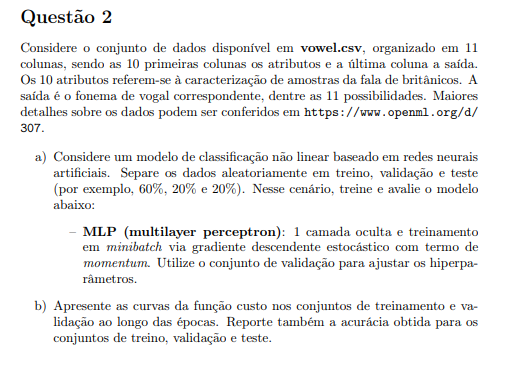

In [19]:
# Carregar o conjunto de dados
data = pd.read_csv('vowel.csv')

In [20]:
# Separar os dados em X (atributos) e Y (saída)
X = data.iloc[:, :-1].values  # 10 primeiras colunas (atributos)
Y = data.iloc[:, -1].values  # Última coluna (fonema)

In [21]:
# Converter Y para inteiros, caso sejam strings
unique_classes, Y = np.unique(Y, return_inverse=True)

In [22]:
# Converter Y para one-hot encoding
num_classes = len(unique_classes)
Y_one_hot = np.eye(num_classes)[Y]

In [23]:
# Normalizar os dados
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [24]:
# Dividir os dados em treino (60%), validação (20%) e teste (20%)
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
train_size = int(X.shape[0] * 0.6)
val_size = int(X.shape[0] * 0.2)

X_train, X_val, X_test = X[indices[:train_size]], X[indices[train_size:train_size+val_size]], X[indices[train_size+val_size:]]
Y_train, Y_val, Y_test = Y_one_hot[indices[:train_size]], Y_one_hot[indices[train_size:train_size+val_size]], Y_one_hot[indices[train_size+val_size:]]

In [25]:
# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [26]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [27]:
# Função softmax para a camada de saída
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [28]:
# Inicialização dos pesos
def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

In [29]:
# Passo à frente (Forward pass)
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [30]:
# Retropropagação (Backpropagation)
def backward_pass(X, Y, Z1, A1, Z2, A2, W2):
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

In [31]:
# Atualização dos pesos
def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate, momentum, v_dW1, v_db1, v_dW2, v_db2):
    v_dW1 = momentum * v_dW1 + (1 - momentum) * dW1
    v_db1 = momentum * v_db1 + (1 - momentum) * db1
    v_dW2 = momentum * v_dW2 + (1 - momentum) * dW2
    v_db2 = momentum * v_db2 + (1 - momentum) * db2

    W1 -= learning_rate * v_dW1
    b1 -= learning_rate * v_db1
    W2 -= learning_rate * v_dW2
    b2 -= learning_rate * v_db2
    
    return W1, b1, W2, b2, v_dW1, v_db1, v_dW2, v_db2

In [32]:
# Função de perda (Cross-Entropy)
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

In [33]:
# Treinamento da rede
def train(X_train, Y_train, X_val, Y_val, input_size, hidden_size, output_size, epochs, learning_rate, momentum, batch_size):
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)
    v_dW1, v_db1, v_dW2, v_db2 = 0, 0, 0, 0
    
    train_losses = []
    val_losses = []
    val_accuracies = []
    train_accuracies = []

    for epoch in range(epochs):
        # Embaralhar dados e criar minibatches
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        Y_train_shuffled = Y_train[permutation]
        
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            Y_batch = Y_train_shuffled[i:i+batch_size]
            
            Z1, A1, Z2, A2 = forward_pass(X_batch, W1, b1, W2, b2)
            dW1, db1, dW2, db2 = backward_pass(X_batch, Y_batch, Z1, A1, Z2, A2, W2)
            W1, b1, W2, b2, v_dW1, v_db1, v_dW2, v_db2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate, momentum, v_dW1, v_db1, v_dW2, v_db2)
        
        # Calcular o erro e a acurácia para o conjunto de treino
        _, _, _, A2_train = forward_pass(X_train, W1, b1, W2, b2)
        train_loss = cross_entropy_loss(Y_train, A2_train)
        train_losses.append(train_loss)
        
        train_predictions = np.argmax(A2_train, axis=1)
        train_labels = np.argmax(Y_train, axis=1)
        train_accuracy = np.mean(train_predictions == train_labels)
        train_accuracies.append(train_accuracy)

        # Calcular o erro e a acurácia para o conjunto de validação
        _, _, _, A2_val = forward_pass(X_val, W1, b1, W2, b2)
        val_loss = cross_entropy_loss(Y_val, A2_val)
        val_losses.append(val_loss)
        
        val_predictions = np.argmax(A2_val, axis=1)
        val_labels = np.argmax(Y_val, axis=1)
        val_accuracy = np.mean(val_predictions == val_labels)
        val_accuracies.append(val_accuracy)
        
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {train_loss}, Validation Loss: {val_loss}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}')
    
    return W1, b1, W2, b2, train_losses, val_losses, train_accuracies, val_accuracies

In [34]:
# Parâmetros da rede
input_size = X_train.shape[1]  # Número de atributos (10)
hidden_size = 10  # Número de neurônios na camada oculta (ajustável)
output_size = num_classes  # Número de classes (11 fonemas)
epochs = 1000  # Número de épocas (ajustável)
learning_rate = 0.01  # Taxa de aprendizado (ajustável)
momentum = 0.9  # Termo de momentum (ajustável)
batch_size = 32  # Tamanho do minibatch (ajustável)

In [35]:
# Treinamento do modelo
W1, b1, W2, b2, train_losses, val_losses, train_accuracies, val_accuracies = train(X_train, Y_train, X_val, Y_val, input_size, hidden_size, output_size, epochs, learning_rate, momentum, batch_size)

Epoch 1/1000, Training Loss: 2.3975750940566614, Validation Loss: 2.399832507468307, Training Accuracy: 0.07588532883642496, Validation Accuracy: 0.1218274111675127
Epoch 2/1000, Training Loss: 2.397176625926698, Validation Loss: 2.4003570514480375, Training Accuracy: 0.09780775716694773, Validation Accuracy: 0.07106598984771574
Epoch 3/1000, Training Loss: 2.3967595489021094, Validation Loss: 2.400774186167243, Training Accuracy: 0.09780775716694773, Validation Accuracy: 0.07106598984771574
Epoch 4/1000, Training Loss: 2.3963756669476135, Validation Loss: 2.40137013822501, Training Accuracy: 0.09780775716694773, Validation Accuracy: 0.07106598984771574
Epoch 5/1000, Training Loss: 2.3959179611112984, Validation Loss: 2.4022201691619025, Training Accuracy: 0.10286677908937605, Validation Accuracy: 0.07106598984771574
Epoch 6/1000, Training Loss: 2.3956810809142364, Validation Loss: 2.4026290543562414, Training Accuracy: 0.10286677908937605, Validation Accuracy: 0.07106598984771574
Epoc

In [36]:
# Avaliação no conjunto de teste
_, _, _, Y_test_pred = forward_pass(X_test, W1, b1, W2, b2)
test_predictions = np.argmax(Y_test_pred, axis=1)
test_labels = np.argmax(Y_test, axis=1)
test_accuracy = np.mean(test_predictions == test_labels)
test_loss = cross_entropy_loss(Y_test, Y_test_pred)

In [37]:
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Test Loss: 1.2677208488705394, Test Accuracy: 0.542713567839196


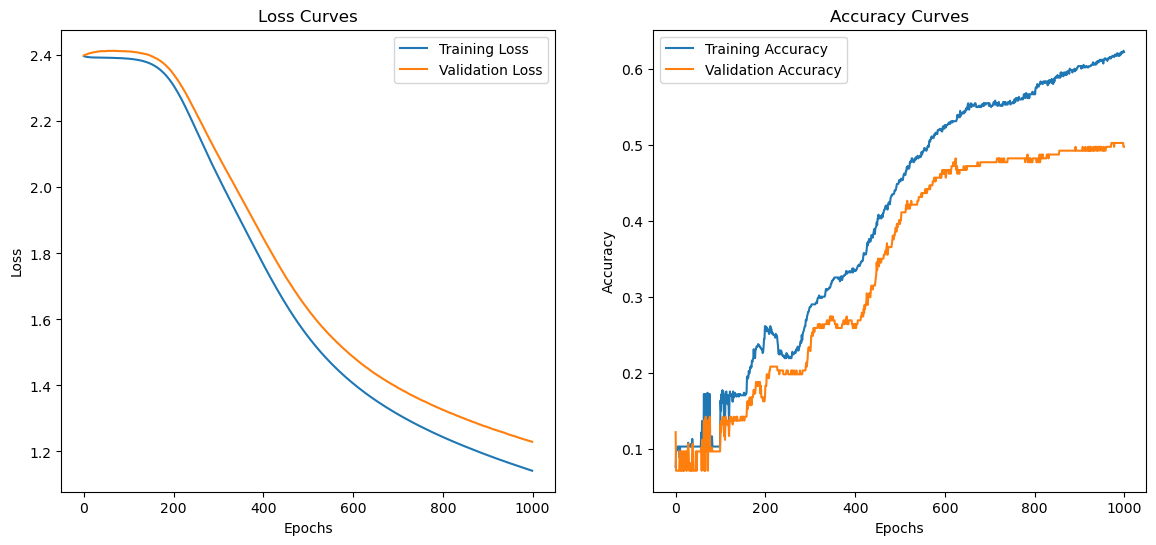

In [38]:
# Plotagem das curvas de custo e acurácia
plt.figure(figsize=(14, 6))

# Plotagem das curvas de custo (loss)
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

# Plotagem das curvas de acurácia (accuracy)
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.show()